# Table of Contents
 <p>

# Topic modeling and sentiment analysis

In this practice we will perform topic modeling and sentiment analysis on two datasets.

# Activity 1: Load the kaggle voted dataset and perform following tasks 

* Focus on the "Description" column and preprocess if required
* Fit an LDA model with 10 topics on the "Description" column 
    * While creating TF matrix ignore terms that have a document frequency strictly higher than 100
* Print top-5 words per topic

### Load data file

In [1]:
# load necessary packages
import json
import pandas as pd
import re

In [4]:
filepath = "/dsa/data/DSA-8410/voted-kaggle-dataset.csv"

df = pd.read_csv(filepath, encoding = 'utf-8')
print(df['Description'].head(5))


0    The datasets contains transactions made by cre...
1    The ultimate Soccer database for data analysis...
2    Background\nWhat can we say about the success ...
3    Context\nInformation on more than 170,000 Terr...
4    Context\nBitcoin is the longest running and mo...
Name: Description, dtype: object


### Create a TF matrix

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


In [6]:
print(df.shape)
desc = df['Description'].dropna()
print(desc.shape)

(2150, 15)
(2145,)


In [10]:
docs = desc.values
countVectorizer = CountVectorizer(stop_words='english', max_df=100)
termFrequency = countVectorizer.fit_transform(docs)
featureNames = countVectorizer.get_feature_names()

### Fit an LDA model

In [11]:
lda = LatentDirichletAllocation(n_components=10)
lda.fit(termFrequency)

LatentDirichletAllocation()

### Print top 10 words per topic

In [12]:
for idx, topic in enumerate(lda.components_):
    print("Topic", idx, " ".join(featureNames[i] for i in topic.argsort()[:-10 -1:-1]))

Topic 0 trained networks deep recognition residual learned depth transferable convolutional imagenet
Topic 1 survey school education uci stock numeric low census students txt
Topic 2 nominal movie product reviews question ratings movies rating temperature review
Topic 3 dry vectors child txt event map events position element attacks
Topic 4 numeric match news matches player players post wine attributes job
Topic 5 pokemon race en election season score horse wikipedia players property
Topic 6 integer player strongly tweet food interested station shot tweets enjoy
Topic 7 player languages speech migration zillow movies survey estimates economic missing
Topic 8 chicago crime report children reported police food county companies bitcoin
Topic 9 police air reviews string bigquery traffic india measured local agency


# Activity 2: Load the Twitter US Airline Sentiment data and perform the following task

* Preprocess the text column with the removal of all the mentions 
* Identify sentiment (pos, neg, neu) for each of the tweets using the standard rule mentioned in the lab
* Print the classification report

### Load data file

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

In [14]:
filepath = "/dsa/data/DSA-8410/Twitter-US-Airline-Sentiment/Tweets.csv"

df_all = pd.read_csv(filepath)
df_all.head()


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

### Preprocess the tweets

In [15]:
tweets = [re.sub(r'@(\w+)','', t) for t in df_all['text'].values]

### Identify polarity for each tweet 

In [17]:
analyzer = SentimentIntensityAnalyzer()
tweets_sentiment = [analyzer.polarity_scores(t) for t in tweets]

df = pd.DataFrame(tweets_sentiment)
df['tweet'] = tweets
df.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.000  1.000  0.0    0.0000   
2  0.000  1.000  0.0    0.0000   
3  0.259  0.741  0.0   -0.5984   
4  0.351  0.649  0.0   -0.5829   

                                               tweet  
0                                        What  said.  
1   plus you've added commercials to the experien...  
2   I didn't today... Must mean I need to take an...  
3   it's really aggressive to blast obnoxious "en...  
4           and it's a really big bad thing about it

In [18]:
df.describe()

neg           neu           pos      compound
count  14640.000000  14640.000000  14640.000000  14640.000000
mean       0.089370      0.777498      0.133132      0.052396
std        0.120363      0.187510      0.181524      0.456591
min        0.000000      0.000000      0.000000     -0.966800
25%        0.000000      0.673000      0.000000     -0.296000
50%        0.000000      0.797000      0.072000      0.000000
75%        0.156000      0.913000      0.210000      0.437400
max        1.000000      1.000000      1.000000      0.976000

### Perform a rule-base classification

In [21]:
df['sentiment'] = 'NEU'
df.loc[df['compound'] > 0.05, 'sentiment'] = 'POS'
df.loc[df['compound'] < -0.05, 'sentiment'] = 'NEG'

df.head()

neg    neu  pos  compound  \
0  0.000  1.000  0.0    0.0000   
1  0.000  1.000  0.0    0.0000   
2  0.000  1.000  0.0    0.0000   
3  0.259  0.741  0.0   -0.5984   
4  0.351  0.649  0.0   -0.5829   

                                               tweet sentiment  
0                                        What  said.       NEU  
1   plus you've added commercials to the experien...       NEU  
2   I didn't today... Must mean I need to take an...       NEU  
3   it's really aggressive to blast obnoxious "en...       NEG  
4           and it's a really big bad thing about it       NEG

<AxesSubplot:xlabel='sentiment', ylabel='compound'>

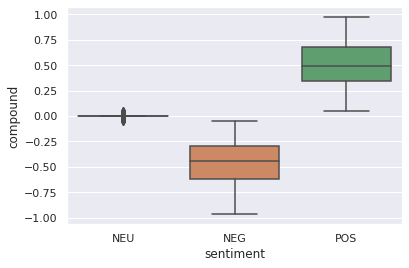

In [22]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.boxplot(x="sentiment", y="compound", data=df)

### Report classification metrices

In [24]:
y_true = df_all["airline_sentiment"].map({'neutral':'NEU','positive':'POS','negative':'NEG'})
y_pred = df['sentiment']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         NEG       0.90      0.50      0.64      9178
         NEU       0.38      0.43      0.40      3099
         POS       0.34      0.87      0.49      2363

    accuracy                           0.54     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.54      0.57     14640



# Save your notebook, then `File > Close and Halt`